In [19]:
# Import our libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

In [2]:
##############################################################
### OUTLINE FOR ANALYST RANKING LEADERBOARD ###




### History of Recommendations for stock(s) ###


### Leaderboard Ranking based on: Accuracy, Influence, Clout, etc ###


### Industry and Sector Forecasts ###


##############################################################

In [3]:
##############################################################
### OUTLINE FOR NEWS & OPINION POLLS ###


##############################################################
### NEWS ###

### Relevant News Stream With Watchlist Mentions ###


### News and Social Media Sentiment Metrics ###


### News Aggregation Stream ###


### Market News: IPOs, Defaults, M&A, Movements ###


##############################################################
### OPINION POLLS ###


### Bull/Bear Polls ###


### VIX & VIX Sentiment ###


### Margin Debt Indicator ###


### Short Interest and Short Indicators ###


### Unusual Options Activity ###

In [4]:
##############################################################
### OUTLINE FOR STOCK INFORMATION ###


### Stock Metrics ###


### Information ###


### Error Handling ###


### Charts ###


### Analysts Activity and Ranking ###

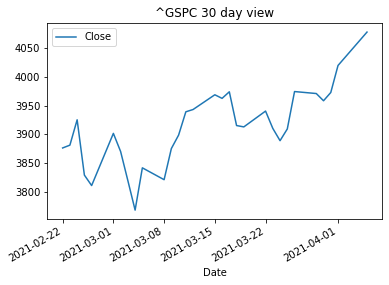

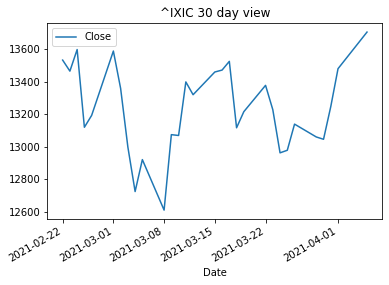

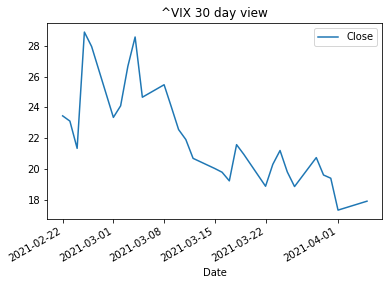

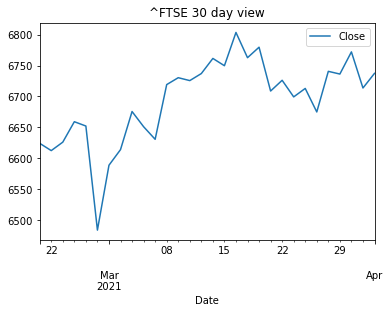

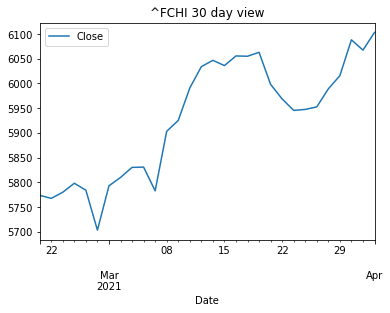

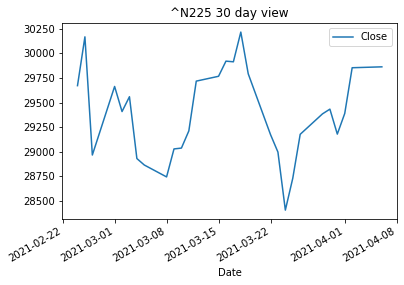

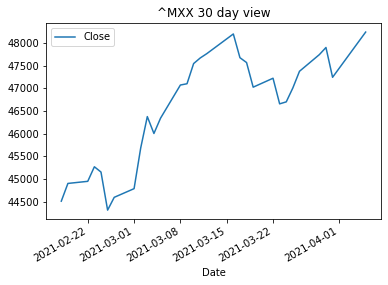

In [5]:
##############################################################
### OUTLINE FOR GLOBAL MOVEMENTS ###

# Here we want to gather and display data from indicies around the world
indicies = {'^GSPC': 'SP500',
            '^IXIC': 'Nasdaq,',
           '^VIX': 'VIX',
           '^FTSE': 'FTSE 100 (UK)',
           '^FCHI': 'CAC40 (FRANCE)',
           '^N225': 'Nikkei (Japan)',
           '^MXX': 'IPC MX (Mexico)'}

tickers = indicies.keys()
ticknames = indicies.values()

def plotindicies(ticker):
    tick = yf.Ticker(ticker)
    index = tick.history(period='30d').Close
    indexdf = pd.DataFrame(index)
    plot = indexdf.plot(title = '%s 30 day view' % ticker)
    return plot
    


# building our dataframe
def globalmarkets(tickers):
    indicies1 = pd.DataFrame(columns = ticknames)

    for tick in tickers:
        indicies = yf.Ticker(tick)
        indicies = indicies.history(period='5y').Close
        indicies = pd.DataFrame(indicies)
        #indicies.columns = [tick]
        indicies1.append(indicies)
        # #
        # indicies = indicies.append(indicies)
    #closedf = pd.DataFrame(indicies)
    
    return indicies


    plotindicies('MSFT')

for tick in tickers:
    plotindicies(tick)


### Indicies Price Changes ###


### Indicies Metrics ###


### Sector Metrics ###


### Sector Price Changes ### 

In [ ]:
##############################################################
### OUTLINE FOR GLOBAL NEWS & SENTIMENT ###


### Global Foreign News Translator ###


### Foreign Social Media Sentiment Monitor ###


### Monetary Policy and Fiscal Policy News Monitor ###


### Government Movements Monitor ###


### Top Central Banks Movements and Bal. Sheet Changes ###



In [4]:
def analystrecom(ticker):
    stock = yf.Ticker(ticker)
    # Get recommendations from 2020 - Present
    data1 = stock.recommendations['2020'::]
    data2 = pd.DataFrame(data1['To Grade'])
    # Calculate total buys, holds, sells
    buys = data2.where((data2=='Buy') | (data2=='Overweight') | (data2=='Outperform') | (data2=='Strong Buy') | (data2=='Positive'))
    holds = data2.where((data2=='Neutral') | (data2=='Hold') | (data2=='Market Perform') | (data2=='Equal-Weight') | (data2=='Sector Weight') | (data2=='Sector Perform'))
    sells = data2.where((data2=='Sell') | (data2=='Underweight') | (data2=='Underperform'))
    # Convert totals to numbers
    num_buys = buys.count()
    num_holds = holds.count()
    num_sells = sells.count()
    # Create a dataframe from them
    # Recoms = pd.DataFrame(data = [num_buys, num_sells, num_holds], columns=['Buys','Holds', 'Sells'])
    # Plotting
    #fig = plt.figure()
    #ax = fig.add_axes([0,0,1,1])
    #values = [num_buys, num_sells, num_holds]
    #recoms = ['Buys', 'Holds', 'Sells']
    #ax.bar(values, recoms)
    #plt.show()
    Recoms = {'Buys': num_buys,'Sells': num_sells, 'Holds': num_holds}
    Recommendations = pd.DataFrame(Recoms)
    #Recommendations.plot.bar(rot=0)
    Recommendations.insert(loc=0,column='ticker',value=ticker)
    Recommendations.reset_index(drop=True, inplace=True)
    return(Recommendations)

#opendf = pd.DataFrame()
#for i in tickers:
  #  opendf.append(Recommendations)
  #  print(opendf)
  #  continue
#opendf = pd.DataFrame(columns=['ticker','Buys','Sells','Holds'])
#for i in tickers: 
    #opendf = opendf.append(analystrecom(i))
    #AnalystRecom = pd.DataFrame(opendf.append(analystrecom(i)))
    #print(AnalystRecom)
#analystrecom('aapl')
def recoms(tickers):
    seriesofdf = tickers.apply(analystrecom).values
    masterdf = pd.concat(seriesofdf)
    masterdf.reset_index(drop=True, inplace=True)
    return masterdf

In [15]:
analystrecom('aapl')

,Firm,To Grade,From Grade,Action
Date,,,,
2012-02-09 08:17:00,Canaccord Genuity,Buy,,main
2012-03-08 07:33:00,FBN Securities,Outperform,,main
2012-03-13 06:08:00,Jefferies,Buy,,main
2012-03-14 06:13:00,Morgan Stanley,Overweight,,main
2012-03-14 08:21:00,Canaccord Genuity,Buy,,main
...,...,...,...,...
2021-01-28 18:59:50,Piper Sandler,Overweight,,main
2021-01-28 19:03:20,Wells Fargo,Overweight,,main
2021-01-28 19:08:11,Deutsche Bank,Buy,,main


In [92]:
### Function to show recomendations by year
def analystrecom(ticker):
    stock = yf.Ticker(ticker)
    # Get recommendations from 2020 - Present
    data1 = stock.recommendations[::]
    data2 = pd.DataFrame(data1['To Grade'])
    # Calculate total buys, holds, sells
    buys = data2.where((data2=='Buy') | (data2=='Overweight') | (data2=='Outperform') | (data2=='Strong Buy') | (data2=='Positive'))
    holds = data2.where((data2=='Neutral') | (data2=='Hold') | (data2=='Market Perform') | (data2=='Equal-Weight') | (data2=='Sector Weight') | (data2=='Sector Perform'))
    sells = data2.where((data2=='Sell') | (data2=='Underweight') | (data2=='Underperform'))
    # Group by year
    yts = data2.asfreq('Y')
    # Convert totals to numbers
    num_buys = buys.count()
    num_holds = holds.count()
    num_sells = sells.count()
    # Create a dataframe from them
    Recoms = pd.DataFrame(data = [num_buys, num_sells, num_holds], columns=['Buys','Holds', 'Sells'])
    # # Plotting
    # #fig = plt.figure()
    # #ax = fig.add_axes([0,0,1,1])
    # #values = [num_buys, num_sells, num_holds]
    # #recoms = ['Buys', 'Holds', 'Sells']
    # #ax.bar(values, recoms)
    # #plt.show()
    # Recoms = {'Buys': num_buys,'Sells': num_sells, 'Holds': num_holds}
    # Recommendations = pd.DataFrame(Recoms)
    # #Recommendations.plot.bar(rot=0)
    # Recommendations.insert(loc=0,column='ticker',value=ticker)
    # Recommendations.reset_index(drop=True, inplace=True)
    return yts.index

In [93]:
analystrecom('aapl')

DatetimeIndex(['2012-12-31 08:17:00', '2013-12-31 08:17:00',
               '2014-12-31 08:17:00', '2015-12-31 08:17:00',
               '2016-12-31 08:17:00', '2017-12-31 08:17:00',
               '2018-12-31 08:17:00', '2019-12-31 08:17:00',
               '2020-12-31 08:17:00'],
              dtype='datetime64[ns]', name='Date', freq='A-DEC')

In [1]:
pip install yahoofinancials

  Using cached beautifulsoup4-4.9.3-py3-none-any.whl (115 kB)
  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15190 sha256=22f22c83ab8fca8a25381b12718ca2deff86efa40bf2664245fff4dfc9e8c750
  Stored in directory: c:\users\zeatac\appdata\local\pip\cache\wheels\7d\59\6e\ff5fc25443eef95656f84b7a3a421fa2a9d6eaaae7a1b7c08f
Successfully built yahoofinancials
Note: you may need to restart the kernel to use updated packages.


In [2]:
from yahoofinancials import YahooFinancials

In [3]:
# income statement data
ticker = 'MSFT'
financials = YahooFinancials(ticker)

income_stmt = financials.get_financial_stmts('annual', 'income')

income_stmt

{'incomeStatementHistory': {'MSFT': [{'2020-06-30': {'researchDevelopment': 19269000000,
     'effectOfAccountingCharges': None,
     'incomeBeforeTax': 53036000000,
     'minorityInterest': None,
     'netIncome': 44281000000,
     'sellingGeneralAdministrative': 24709000000,
     'grossProfit': 96937000000,
     'ebit': 52959000000,
     'operatingIncome': 52959000000,
     'otherOperatingExpenses': None,
     'interestExpense': -2591000000,
     'extraordinaryItems': None,
     'nonRecurring': None,
     'otherItems': None,
     'incomeTaxExpense': 8755000000,
     'totalRevenue': 143015000000,
     'totalOperatingExpenses': 90056000000,
     'costOfRevenue': 46078000000,
     'totalOtherIncomeExpenseNet': 77000000,
     'discontinuedOperations': None,
     'netIncomeFromContinuingOps': 44281000000,
     'netIncomeApplicableToCommonShares': 44281000000}},
   {'2019-06-30': {'researchDevelopment': 16876000000,
     'effectOfAccountingCharges': None,
     'incomeBeforeTax': 4368800000

In [4]:
# Dividend history
stocks = ['AAPL', 'MSFT', 'JPM', 'INTC']
start = '2000-1-1'
end = '2015-1-1'
financials = YahooFinancials(stocks)
dividend_hist = financials.get_daily_dividend_data(start, end)

dividend_hist

{'AAPL': [{'date': 1344519000,
   'formatted_date': '2012-08-09',
   'amount': 0.094643},
  {'date': 1352298600, 'formatted_date': '2012-11-07', 'amount': 0.094643},
  {'date': 1360247400, 'formatted_date': '2013-02-07', 'amount': 0.094643},
  {'date': 1368106200, 'formatted_date': '2013-05-09', 'amount': 0.108929},
  {'date': 1375968600, 'formatted_date': '2013-08-08', 'amount': 0.108929},
  {'date': 1383748200, 'formatted_date': '2013-11-06', 'amount': 0.108929},
  {'date': 1391697000, 'formatted_date': '2014-02-06', 'amount': 0.108929},
  {'date': 1399555800, 'formatted_date': '2014-05-08', 'amount': 0.1175},
  {'date': 1407418200, 'formatted_date': '2014-08-07', 'amount': 0.1175},
  {'date': 1415284200, 'formatted_date': '2014-11-06', 'amount': 0.1175}],
 'MSFT': [{'date': 1045665000, 'formatted_date': '2003-02-19', 'amount': 0.08},
  {'date': 1066224600, 'formatted_date': '2003-10-15', 'amount': 0.16},
  {'date': 1093267800, 'formatted_date': '2004-08-23', 'amount': 0.08},
  {'dat

In [5]:
# Turning dividend history into dataframe
MSFT = dividend_hist['MSFT']

MSFTdiv_hist = pd.DataFrame.from_dict(MSFT)

MSFTdiv_hist.drop(columns=['date'])

,formatted_date,amount
0,2003-02-19,0.08
1,2003-10-15,0.16
2,2004-08-23,0.08
3,2004-11-15,3.08
4,2005-02-15,0.08
5,2005-05-16,0.08
6,2005-08-15,0.08
7,2005-11-15,0.08
8,2006-02-15,0.09
9,2006-05-15,0.09


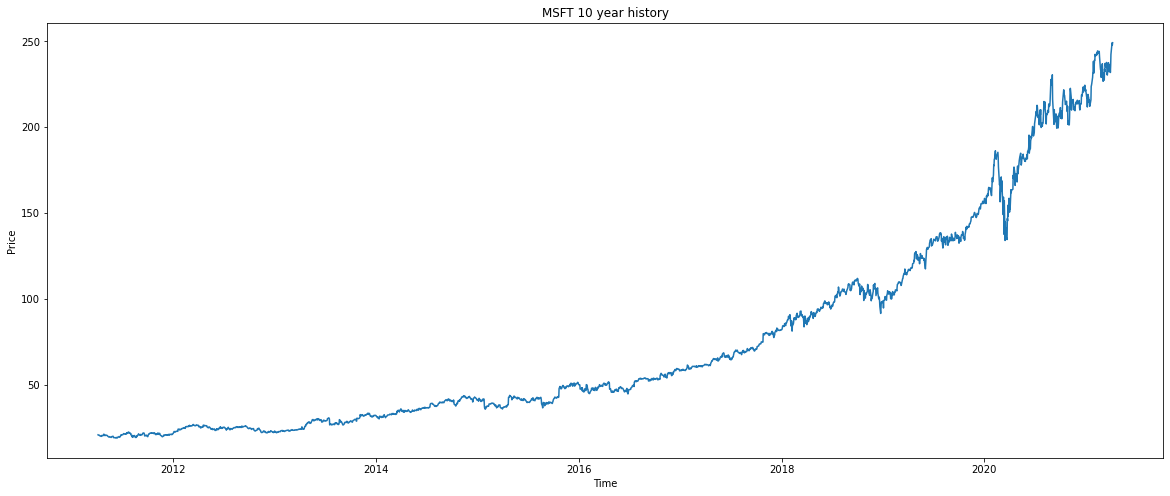

Text(0.5, 0, 'Time')

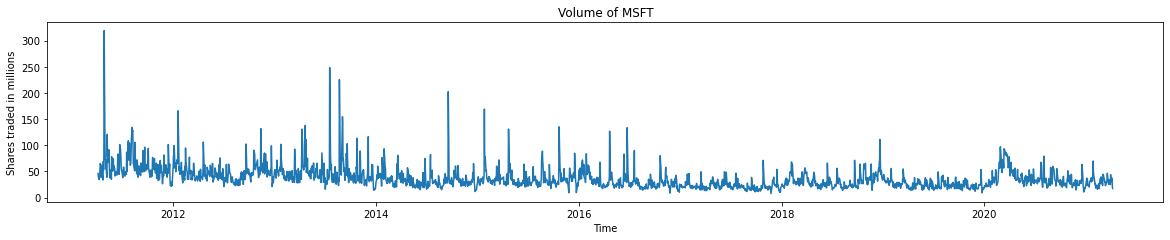

In [46]:
# Retrives stock history with dividends highlighted

tick = yf.Ticker(ticker)
stock_hist = tick.history(period='10Y')
adj_stock_hist = stock_hist[['Close', 'Volume', 'Dividends']]
close = adj_stock_hist['Close']
volume = adj_stock_hist['Volume']
dividends = adj_stock_hist['Dividends']

# Plotting the data
    # size of plot (needs work)
plt.figure(figsize=(20,8))
    # content of plot
plt.plot(close)
    # set plot title, x-label, y-label
plt.title(('{} 10 year history').format(ticker))
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

# Volume plot
plt.figure(figsize=(20,3.3))
plt.plot(volume/1000000)
plt.title(('Volume of {}').format(ticker))
plt.ylabel('Shares traded in millions')
plt.xlabel('Time')


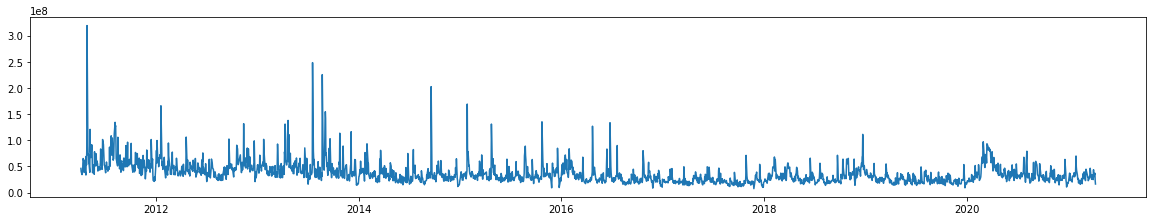

In [25]:
# plot the volume data
fig = plt.figure(figsize=(20,3.3))

plt.plot(volume)
